In [1]:
import sys
sys.path.append('../')

In [2]:
import seaduck as sd

In [3]:
import os


In [4]:
import numpy as np
from open4dense import give_me_orig_ecco
import xarray as xr
import os 
import ecco_v4_py as e4p

def array2mask(xa,write_path = False,form = '>f4'):
    """
    Create a mask for emu using xarray dataarray

    Parameter:
    ----------
    xa: xr.DataArray
        The dataarray to be converted into emu mask
    write_path: False or string
        The path for saving mask file. If not provided, return the numpy array
    form: string
        The data format, use >f8 for tracer.
    """
    transformed = e4p.llc_tiles_to_compact(xa)
    mask = np.array(transformed).astype(form).ravel()
    if not write_path:
        return mask
    else:
        mask.tofile(write_path)

int_arg = 0

filedb_lst = []
for i in range(1,13):
    for j in range(1,4):
        filedb_lst.append(f'/sciserver/filedb{i:02}-0{j}')
        os.listdir(f'/sciserver/filedb{i:02}-0{j}')


save_path = filedb_lst[9+int_arg]+'/ocean/wenrui_temp/particle_file/NEP/nc_backward_seas/'
path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'

ds = give_me_orig_ecco()
ds['utrans'] = (ds['u_gm']+ds['UVELMASS'])*ds.dyG*ds.drF
ds['vtrans'] = (ds['v_gm']+ds['VVELMASS'])*ds.dxG*ds.drF
ds['wtrans'] = (ds['w_gm']+ds['WVELMASS'])*ds.rA
tseas1 = xr.open_zarr(path+'tseas1.zarr')
tseas2 = xr.open_zarr(path+'tseas2.zarr')
tseas3 = xr.open_zarr(path+'tseas3.zarr')
tseas = xr.concat([tseas1,tseas2,tseas3],dim = 'dayofyear')
ta = (ds.THETA.groupby('time.dayofyear') - tseas).transpose('time','Z','face','Y','X').THETA

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]


In [11]:
from quickplot import *

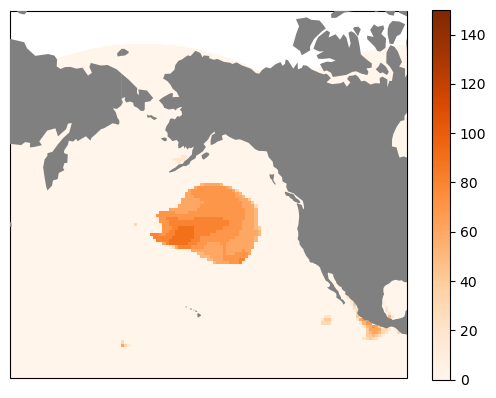

In [24]:
time = '2014-01-01'
ylim = (10,70)
xlim = (180,270)

xbool = np.logical_and(ds.XC%360>xlim[0],ds.XC%360<xlim[1])
ybool = np.logical_and(ds.YC>ylim[0],ds.YC<ylim[1])
pos_bool = np.logical_and(np.logical_and(xbool,ybool),ds.Z>-200).transpose('Z','face','Y','X')
warm_bool = ta.sel(time = time)[0]>1.5
those = np.logical_and(warm_bool,pos_bool)

quick_tracer(those,drF = ds.drF)
plt.gca().set_extent([145,270,0,60])
# plt.xlim(145,250)

<GeoAxes: >

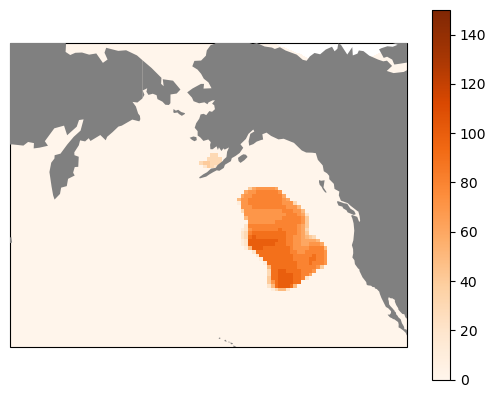

In [6]:
time = '2014-03-01'
ylim = (30,70)
xlim = (145,255)

xbool = np.logical_and(ds.XC%360>xlim[0],ds.XC%360<xlim[1])
ybool = np.logical_and(ds.YC>ylim[0],ds.YC<ylim[1])
pos_bool = np.logical_and(np.logical_and(xbool,ybool),ds.Z>-200).transpose('Z','face','Y','X')
warm_bool = ta.sel(time = time)[0]>1.5
those = np.logical_and(warm_bool,pos_bool)

quick_tracer(those,drF = ds.drF)
# plt.gca().set_extent([145,200,20,60])
# plt.xlim(145,250)

<GeoAxes: >

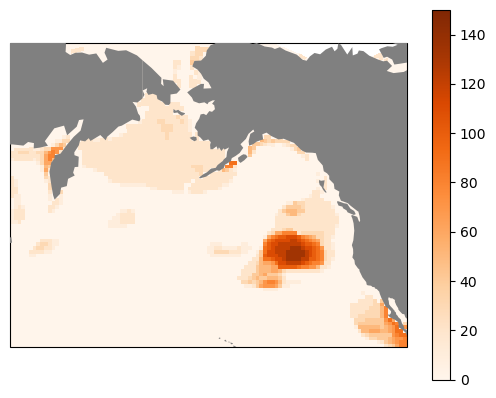

In [7]:
time = '2014-09-01'
ylim = (20,70)
xlim = (145,255)

xbool = np.logical_and(ds.XC%360>xlim[0],ds.XC%360<xlim[1])
ybool = np.logical_and(ds.YC>ylim[0],ds.YC<ylim[1])
pos_bool = np.logical_and(np.logical_and(xbool,ybool),ds.Z>-200).transpose('Z','face','Y','X')
warm_bool = ta.sel(time = time)[0]>1.5
those = np.logical_and(warm_bool,pos_bool)

quick_tracer(those,drF = ds.drF)
# plt.gca().set_extent([145,200,20,60])
# plt.xlim(145,250)

<GeoAxes: >

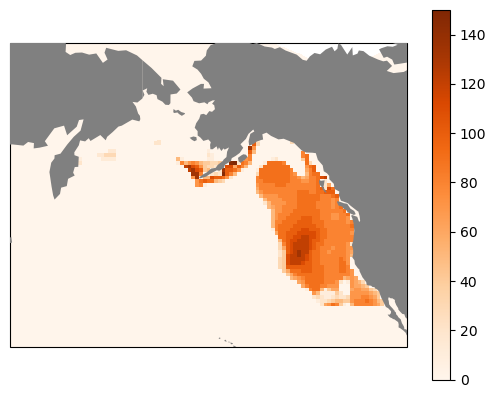

In [8]:
time = '2015-03-01'
ylim = (30,60)
xlim = (145,255)

xbool = np.logical_and(ds.XC%360>xlim[0],ds.XC%360<xlim[1])
ybool = np.logical_and(ds.YC>ylim[0],ds.YC<ylim[1])
pos_bool = np.logical_and(np.logical_and(xbool,ybool),ds.Z>-200).transpose('Z','face','Y','X')
warm_bool = ta.sel(time = time)[0]>1.5
those = np.logical_and(warm_bool,pos_bool)

quick_tracer(those,drF = ds.drF)
# plt.gca().set_extent([145,200,20,60])
# plt.xlim(145,250)

<GeoAxes: >

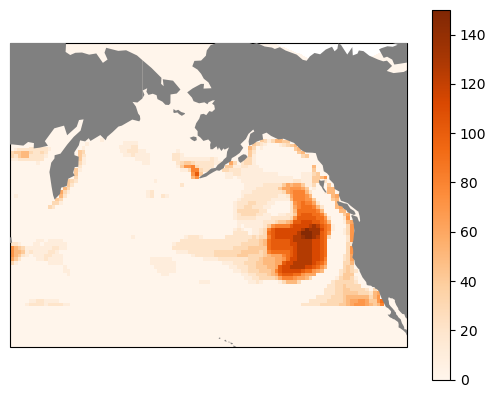

In [9]:
time = '2015-09-01'
ylim = (30,60)
xlim = (145,255)

xbool = np.logical_and(ds.XC%360>xlim[0],ds.XC%360<xlim[1])
ybool = np.logical_and(ds.YC>ylim[0],ds.YC<ylim[1])
pos_bool = np.logical_and(np.logical_and(xbool,ybool),ds.Z>-200).transpose('Z','face','Y','X')
warm_bool = ta.sel(time = time)[0]>1.5
those = np.logical_and(warm_bool,pos_bool)

quick_tracer(those,drF = ds.drF)
# plt.gca().set_extent([145,200,20,60])
# plt.xlim(145,250)

<GeoAxes: >

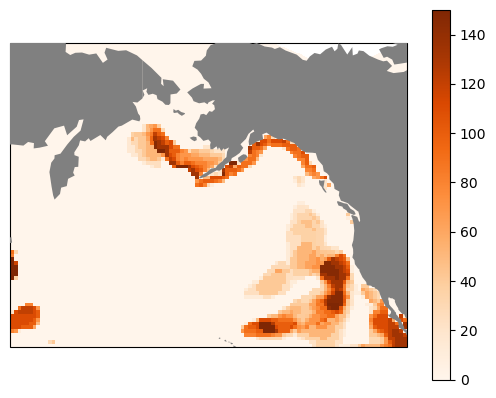

In [10]:
time = '2016-03-01'
ylim = (20,70)
xlim = (145,255)

xbool = np.logical_and(ds.XC%360>xlim[0],ds.XC%360<xlim[1])
ybool = np.logical_and(ds.YC>ylim[0],ds.YC<ylim[1])
pos_bool = np.logical_and(np.logical_and(xbool,ybool),ds.Z>-200).transpose('Z','face','Y','X')
warm_bool = ta.sel(time = time)[0]>1.25
those = np.logical_and(warm_bool,pos_bool)

quick_tracer(those,drF = ds.drF)
# plt.gca().set_extent([145,200,20,60])
# plt.xlim(145,250)

<GeoAxes: >

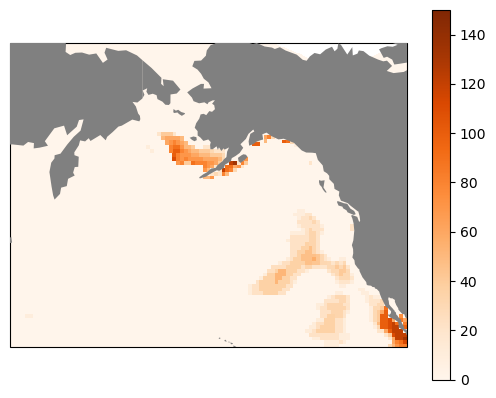

In [11]:
time = '2016-02-01'
ylim = (20,70)
xlim = (145,255)

xbool = np.logical_and(ds.XC%360>xlim[0],ds.XC%360<xlim[1])
ybool = np.logical_and(ds.YC>ylim[0],ds.YC<ylim[1])
pos_bool = np.logical_and(np.logical_and(xbool,ybool),ds.Z>-200).transpose('Z','face','Y','X')
warm_bool = ta.sel(time = time)[0]>1.5
those = np.logical_and(warm_bool,pos_bool)

quick_tracer(those,drF = ds.drF)
# plt.gca().set_extent([145,200,20,60])
# plt.xlim(145,250)

In [26]:
from scipy.ndimage import label

In [27]:
da = ta.sel(time = time)[0]

In [28]:
from seaduck.eulerian_budget import _right90,_left90

In [29]:
def merge_ep(da):
    merged = np.zeros((50,180,180))
    merged[:,:90,:90] = _right90(np.array(da[:,8] ))
    merged[:,90:,:90] = _right90(np.array(da[:,7] ))
    merged[:,:90,90:] = _right90(np.array(da[:,11]))
    merged[:,90:,90:] = _right90(np.array(da[:,10]))
    return merged

def split_merge(merged):
    da = np.zeros((50,13,90,90))
    da[:,8] = _left90(merged[:,:90,:90])
    da[:,7] = _left90(merged[:,90:,:90])
    da[:,11]= _left90(merged[:,:90,90:])
    da[:,10]= _left90(merged[:,90:,90:])
    return da

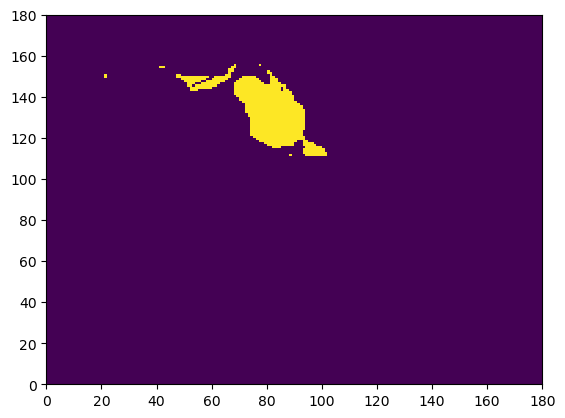

In [16]:
time = '2015-03-01'
ylim = (30,60)
xlim = (145,255)

xbool = np.logical_and(ds.XC%360>xlim[0],ds.XC%360<xlim[1])
ybool = np.logical_and(ds.YC>ylim[0],ds.YC<ylim[1])
pos_bool = np.logical_and(np.logical_and(xbool,ybool),ds.Z>-200).transpose('Z','face','Y','X')
warm_bool = ta.sel(time = time)[0]>1.5
those = np.logical_and(warm_bool,pos_bool)

merged = merge_ep(those)
plt.pcolormesh(merged[0])

In [90]:
labeled_array, num_features = label(merged)

In [93]:
volumes = np.bincount(labeled_array.ravel())

In [114]:
label2select = np.argmax(volumes[1:])+1

In [116]:
largest_blob = labeled_array==label2select

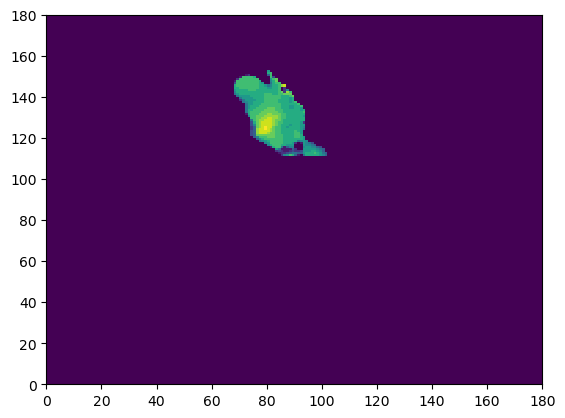

In [119]:
plt.pcolormesh(largest_blob.sum(axis = 0))

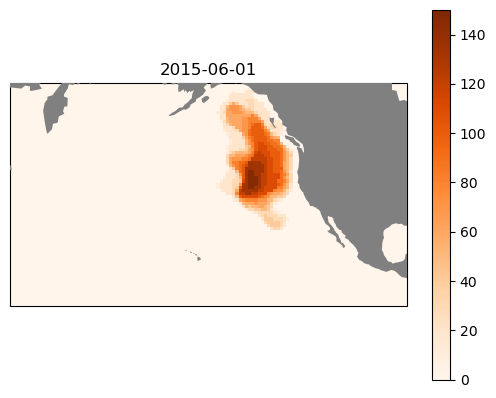

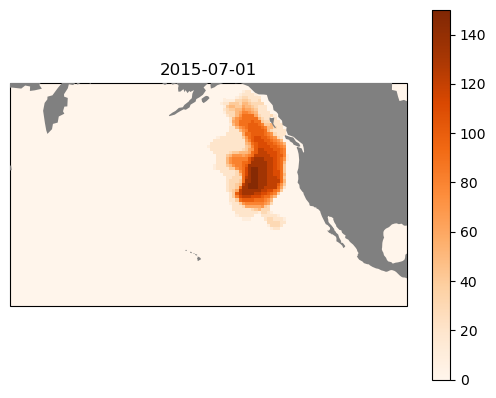

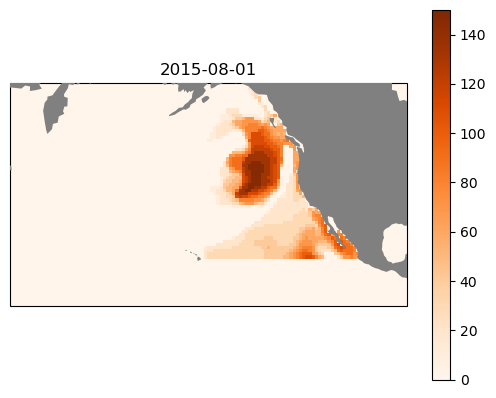

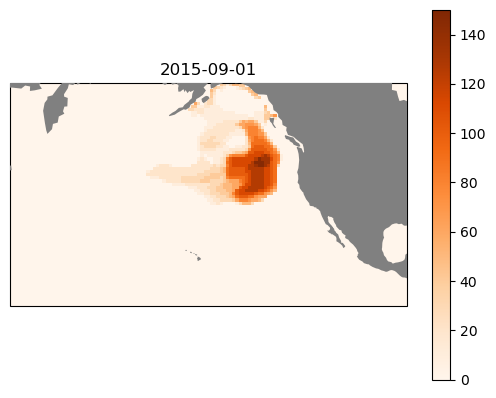

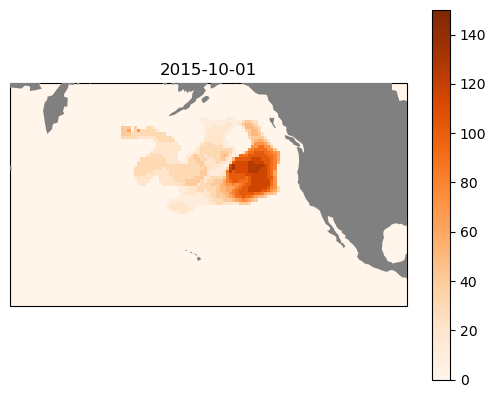

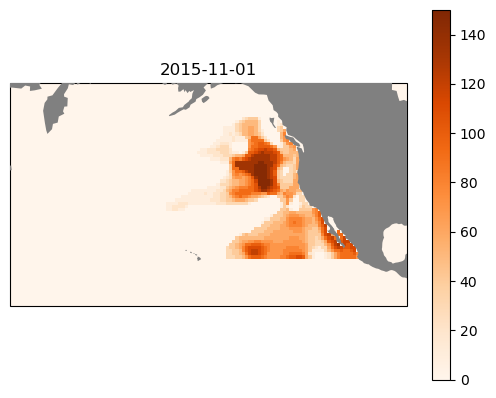

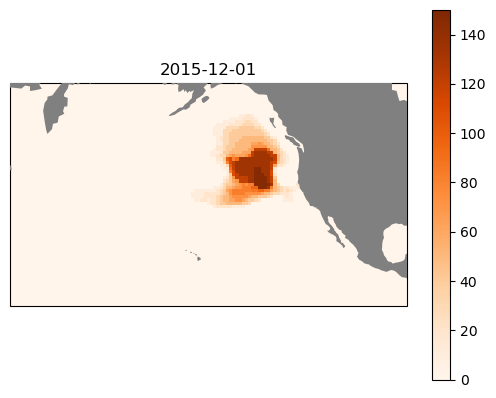

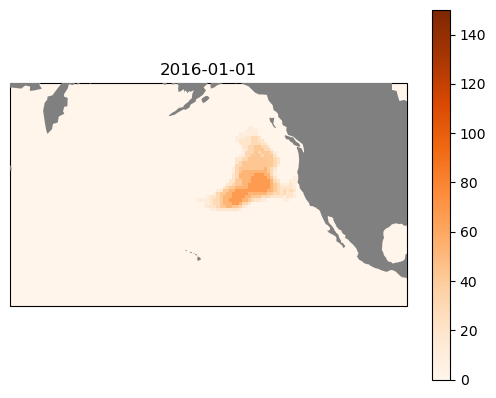

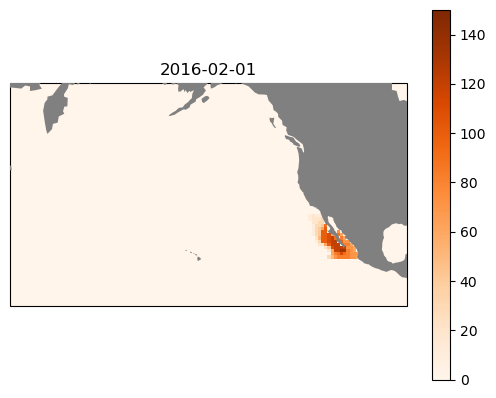

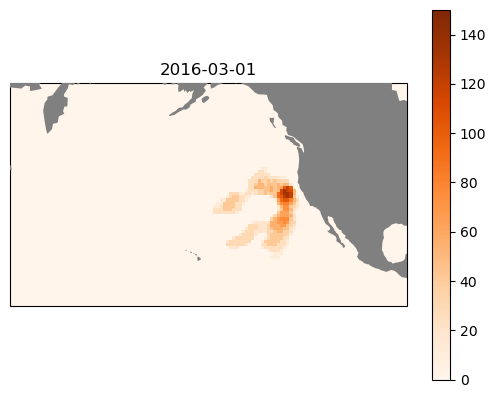

In [89]:
for time in ['2015-06-01','2015-07-01','2015-08-01','2015-09-01','2015-10-01','2015-11-01','2015-12-01','2016-01-01','2016-02-01','2016-03-01']:#,'2016-06-01','2016-09-01','2016-12-01']:
    ylim = (20,60)
    xlim = (180,270)
    
    xbool = np.logical_and(ds.XC%360>xlim[0],ds.XC%360<xlim[1])
    ybool = np.logical_and(ds.YC>ylim[0],ds.YC<ylim[1])
    pos_bool = np.logical_and(np.logical_and(xbool,ybool),ds.Z>-200).transpose('Z','face','Y','X')
    warm_bool = ta.sel(time = time)[0]>1.5
    those = np.logical_and(warm_bool,pos_bool)
    
    merged = merge_ep(those)
    labeled_array, num_features = label(merged)
    volumes = np.bincount(labeled_array.ravel())
    label2select = np.argmax(volumes[1:])+1
    largest_blob = labeled_array==label2select
    
    these = split_merge(largest_blob)
    
    plt.clf()
    quick_tracer(these,drF = ds.drF)
    plt.gca().set_extent([145,270,5,60],crs = ccrs.PlateCarree())
    plt.title(time)
    plt.show()

In [31]:
from gen_mask_2014_3 import array2mask

In [90]:
time = '2014-01-01'
ylim = (20,60)
xlim = (180,270)

In [91]:
for year in [4,5]:
    for month in range(1,13):
        time = f'201{year}-{month:02}-01'
# for time in ['2014-03-01','2014-09-01','2015-03-01','2015-09-01']:
    
        xbool = np.logical_and(ds.XC%360>xlim[0],ds.XC%360<xlim[1])
        ybool = np.logical_and(ds.YC>ylim[0],ds.YC<ylim[1])
        pos_bool = np.logical_and(np.logical_and(xbool,ybool),ds.Z>-200).transpose('Z','face','Y','X')
        warm_bool = ta.sel(time = time)[0]>1.5
        those = np.logical_and(warm_bool,pos_bool)
        
        merged = merge_ep(those)
        labeled_array, num_features = label(merged)
        volumes = np.bincount(labeled_array.ravel())
        label2select = np.argmax(volumes[1:])+1
        largest_blob = labeled_array==label2select
        
        these = split_merge(largest_blob)
        array2mask(these,'mask1.5.'+time,form = '>f8')

llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (50, 90, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array dtype float64
llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (50, 90, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array dtype float64
llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (50, 90, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array dtype float64
llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (50, 90, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_fac

In [41]:
ds['count']= xr.DataArray(np.arange(len(ds.time)),dims = 'time')

In [48]:
for year in [3,4,5,6]:
    for month in range(1,13):
        atime = f'201{year}-{month:02}-01'
        print(atime,int(ds['count'].sel(time = atime))+1)

2013-01-01 7672
2013-02-01 7703
2013-03-01 7731
2013-04-01 7762
2013-05-01 7792
2013-06-01 7823
2013-07-01 7853
2013-08-01 7884
2013-09-01 7915
2013-10-01 7945
2013-11-01 7976
2013-12-01 8006
2014-01-01 8037
2014-02-01 8068
2014-03-01 8096
2014-04-01 8127
2014-05-01 8157
2014-06-01 8188
2014-07-01 8218
2014-08-01 8249
2014-09-01 8280
2014-10-01 8310
2014-11-01 8341
2014-12-01 8371
2015-01-01 8402
2015-02-01 8433
2015-03-01 8461
2015-04-01 8492
2015-05-01 8522
2015-06-01 8553
2015-07-01 8583
2015-08-01 8614
2015-09-01 8645
2015-10-01 8675
2015-11-01 8706
2015-12-01 8736
2016-01-01 8767
2016-02-01 8798
2016-03-01 8827
2016-04-01 8858
2016-05-01 8888
2016-06-01 8919
2016-07-01 8949
2016-08-01 8980
2016-09-01 9011
2016-10-01 9041
2016-11-01 9072
2016-12-01 9102


In [142]:
len(ds.time)

9497

In [146]:
xmask = np.logical_and(ds.XC>-170,ds.XC<-120)
ymask = np.logical_and(ds.YC>-5, ds.YC<5)
zmask = ds.Z>-10
test_mask = np.logical_and(np.logical_and(zmask,ymask),xmask)

In [147]:
array2mask(test_mask,'mask.nino',form = '>f8')

llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (50, 90, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array dtype bool
